# 

In [37]:
import requests
import matplotlib.pyplot as plt
from datetime import datetime, timedelta


stockcode=input("Enter the Company's stock code:")
function_value=("TIME_SERIES_DAILY","TIME_SERIES_WEEKLY","TIME_SERIES_MONTHLY")


# To retrieve the stock data by passing input as company stock and Time Series.

def urlrequest(stock_code,value):
     
    url = "https://alpha-vantage.p.rapidapi.com/query"
    print(stock_code)
    #print(value)
    querystring = {"function":value,"symbol":stock_code,"outputsize":"compact","datatype":"json"}
    
    headers = {
    	"X-RapidAPI-Key": "92f91e6be8mshe0bbe6e55a04aeep156731jsn0d59dd745ac7",
    	"X-RapidAPI-Host": "alpha-vantage.p.rapidapi.com"
    }
    
    response=requests.get(url, headers=headers, params=querystring)
    
    # To get the data and check valid stock code or not.
    
    if response.status_code == 200:
        data = response.json()
        #print(data)
        #API_code=data['Meta Data']['2. Symbol']
        #print(API_code)
        #print(stock_code)
        if stock_code == data['Meta Data']['2. Symbol']:
            return data
        else:
            print("Invalid stock code. Please enter a valid stock code.")
            return None

    


Enter the Company's stock code: AAPL


In [38]:
# Define function to assign X and Y values for six months by passing Time Series as input.

def time_series_xyvalue(stock_data,time_series):

        if time_series == "TIME_SERIES_DAILY":
            time_series_date="Time Series (Daily)"
        elif time_series == "TIME_SERIES_WEEKLY":
            time_series_date="Weekly Time Series"
        elif time_series == "TIME_SERIES_MONTHLY":
            time_series_date="Monthly Time Series"
        else:
             print("Invalid Time Series")
        data=stock_data
        time_series_data = data[f'{time_series_date}']
        
        
        # To assign date values to x-axis
        #x=[date for date in time_series_data.keys()]
        
        # Get all available dates in the data
        dates = list(time_series_data.keys())
        
        # Sort the dates in ascending order (assuming the dates are in the format 'YYYY-MM-DD')
        sorted_dates = sorted(dates)
        
        # Get the last date in the data (most recent date)
        last_date_str = sorted_dates[-1]
        
        
        # Convert the last date string to a datetime object
        last_date = datetime.strptime(last_date_str, '%Y-%m-%d')
        
        # Calculate the date 6 months ago from the last date
        
        six_months_data = last_date-timedelta(days=180)
        
        x=[]
        y=[]
        
        # Loop through the sorted data and select 6 months data
        
        for date_str in sorted_dates:
            date_value=datetime.strptime(date_str,'%Y-%m-%d')
            
            if date_value>=six_months_data:
                # To assign date values to x-axis
                x.append(date_str)
                # To assign closing_prices to y-axis
                
                if '4. close' in time_series_data[date_str]:
                    
                    y.append(float(time_series_data[date_str]['4. close']))
        return x,y


In [39]:
def plotline(x,y,Label):
     # plotting stock prices using MatplotLib
                                                                        
    plt.figure(figsize=(50,40))
    plt.plot(x,y,marker=0,linestyle='-',color='blue',label='Closing Prices')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.title(f'{stockcode} Daily stocking price')
    plt.xticks(rotation=45,ha='right')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def barchart(x,y,Label):
     # plotting stock prices using MatplotLib
                                                                        
    plt.figure(figsize=(30,10))
    plt.bar(x,y,color='blue',label='Closing Prices', width=0.2)
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.title(f'{stockcode} {Label} stocking price')
    plt.xticks(rotation=45,ha='right')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

AAPL
TIME_SERIES_DAILY


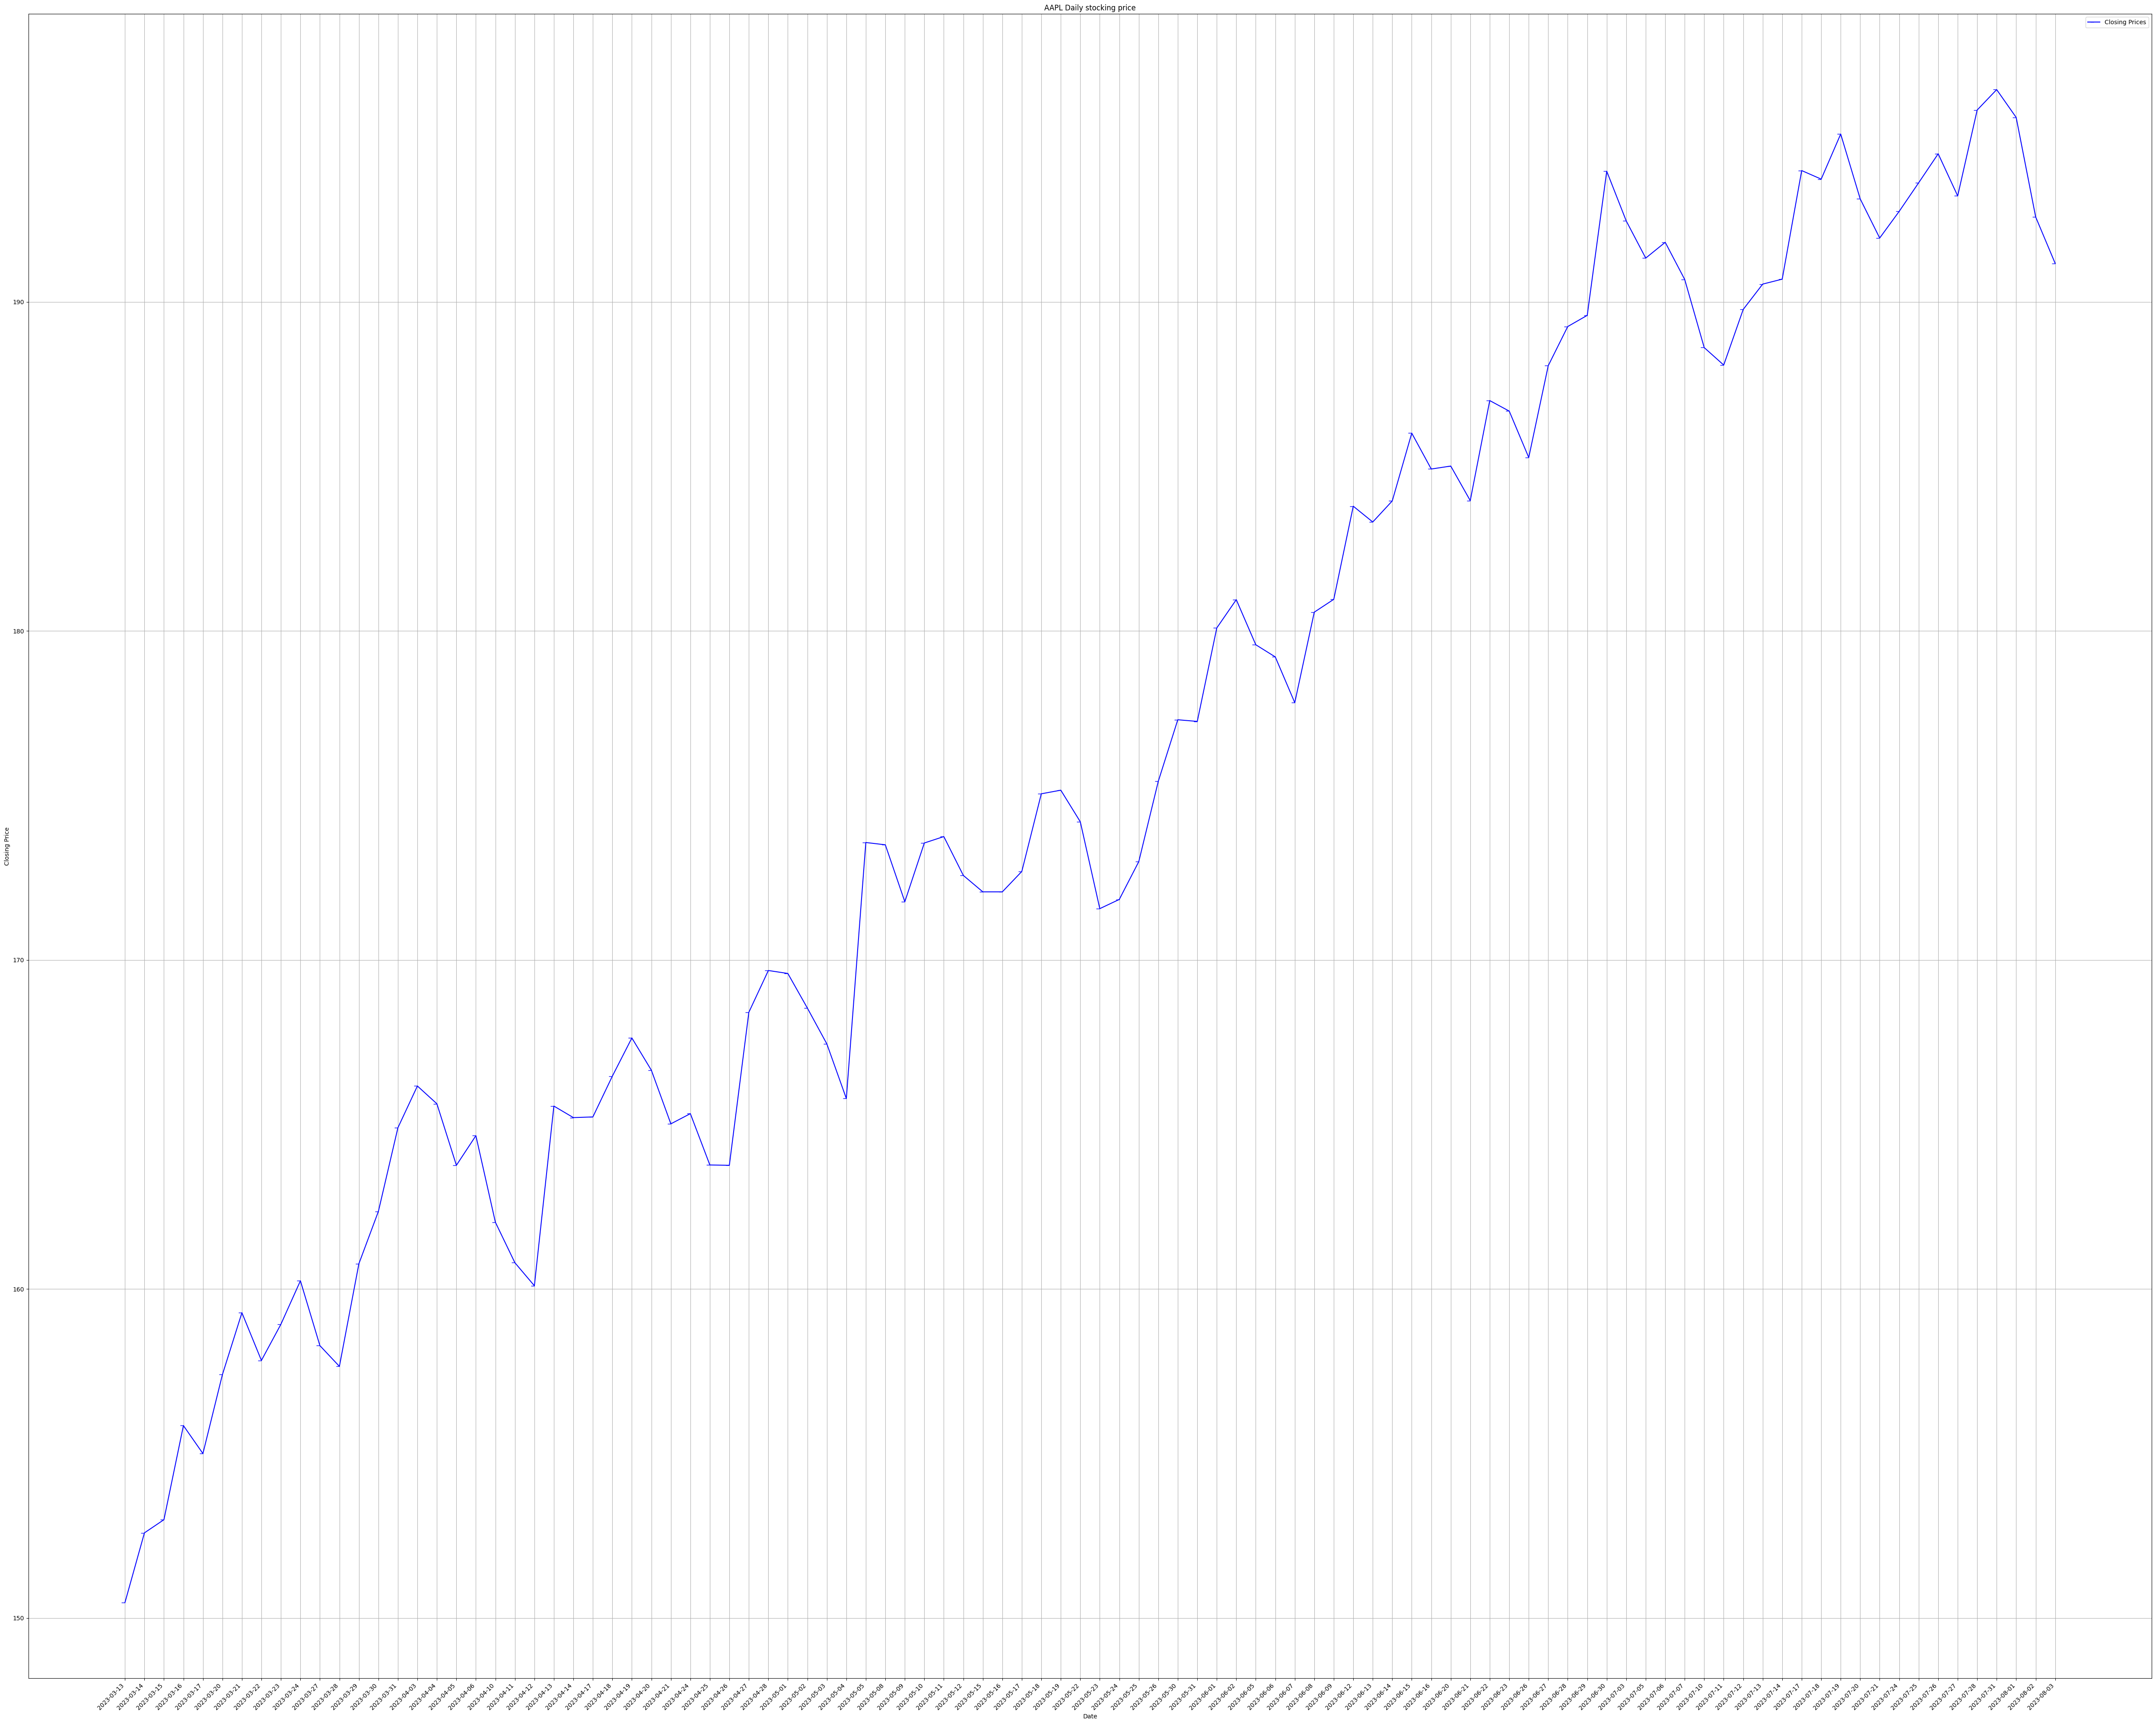

AAPL
TIME_SERIES_WEEKLY


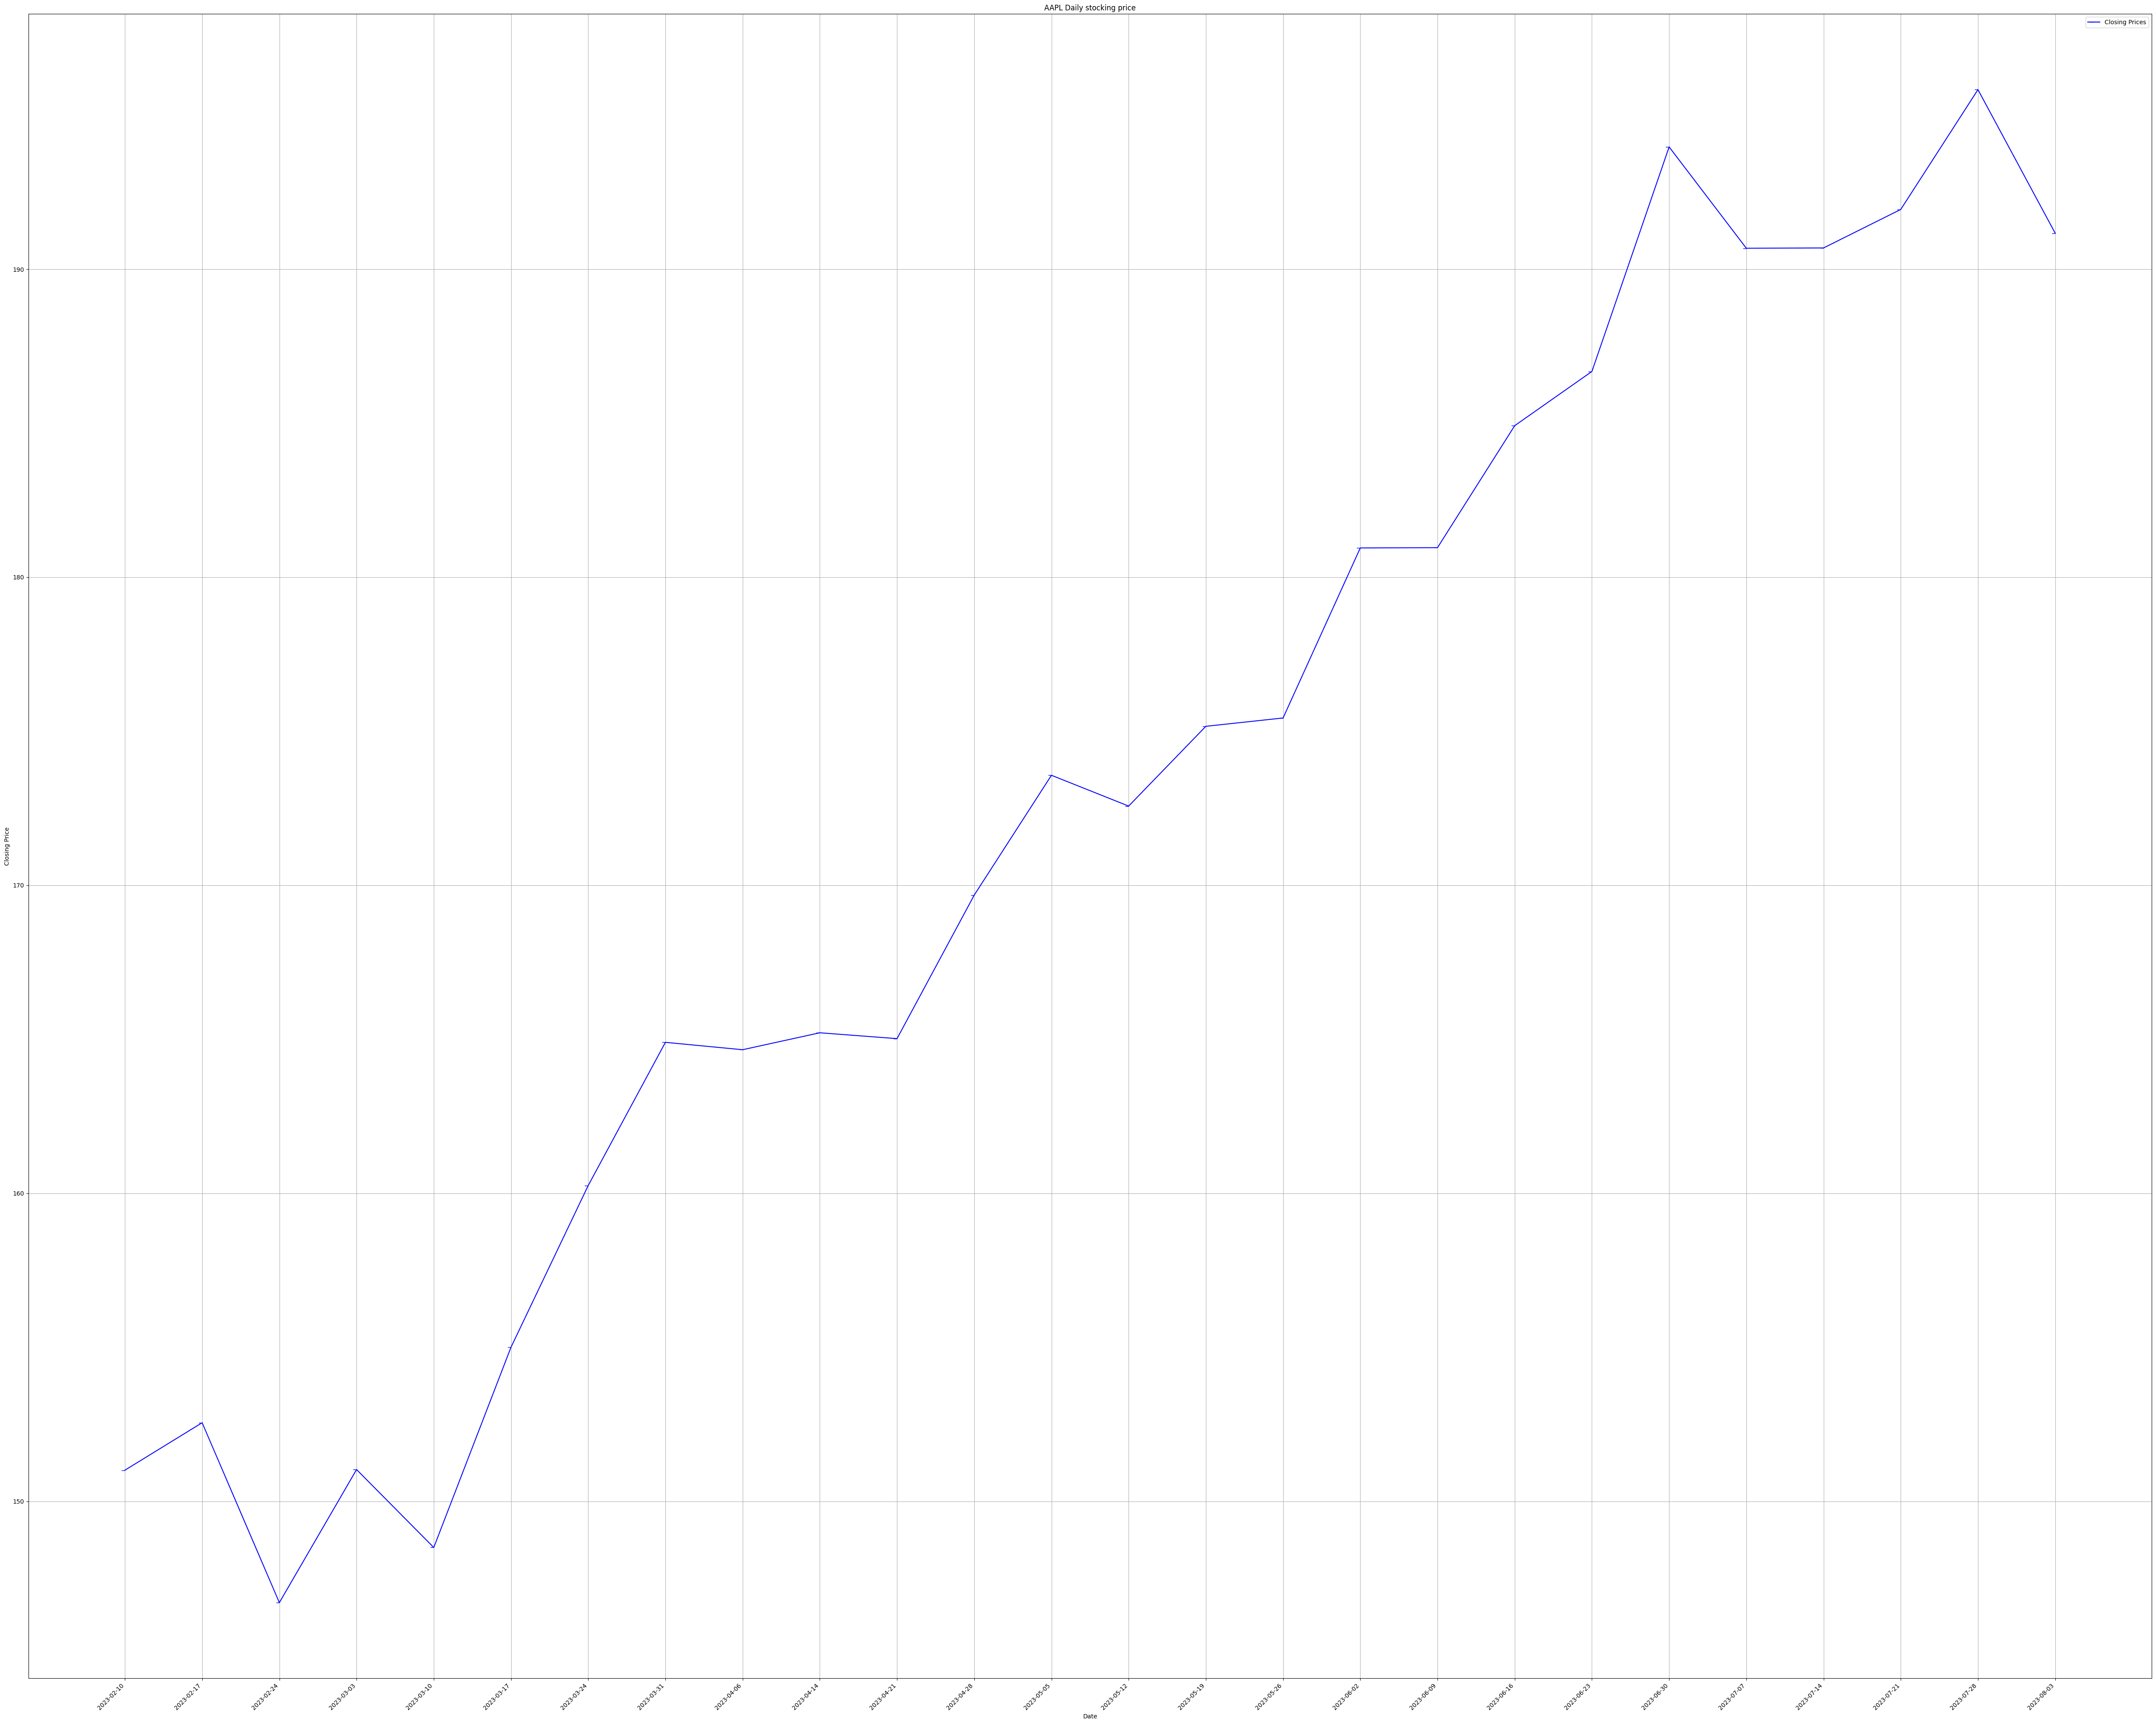

AAPL
TIME_SERIES_MONTHLY


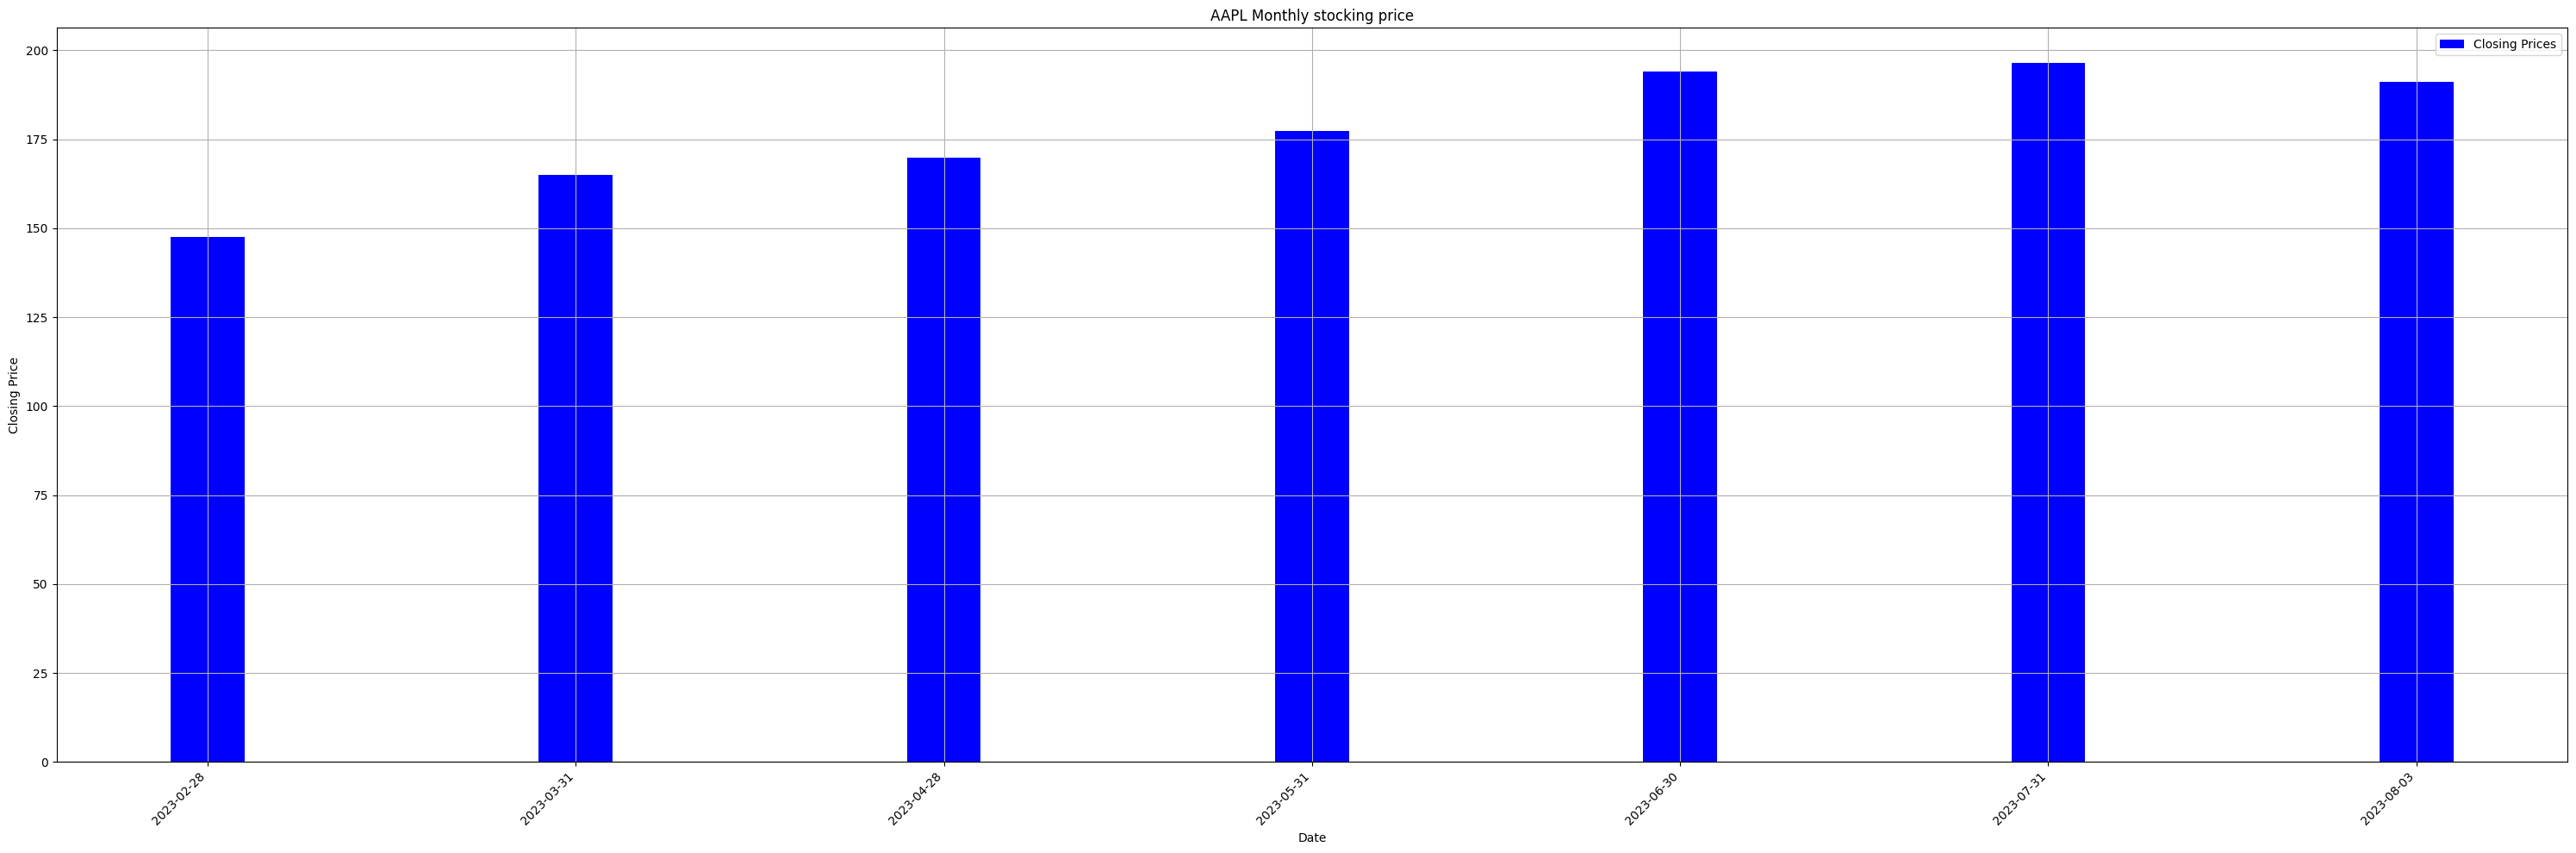

In [40]:

for value in function_value:

    if value == "TIME_SERIES_DAILY":
        Label="Daily"
        stockvalue = urlrequest(stockcode, value)
        print(value)
       # print(stockvalue)
        if  stockvalue is None:
            print("Enter the valid Input")
        else:
            plotvalues = time_series_xyvalue(stockvalue,value)
            #x, y=plotvalues
            xval=plotvalues[0] # This will print the x values
            yval=plotvalues[1] # This will print the y values
            plotline(xval,yval,Label)

    elif value == "TIME_SERIES_WEEKLY":
        Label="Weekly"
        stockvalue = urlrequest(stockcode, value)
        print(value)
        #print(stockvalue)
        if  stockvalue is None:
            print("Enter the valid Input")
        else:  
            plotvalues = time_series_xyvalue(stockvalue,value)
                #x, y=plotvalues
            xval=plotvalues[0] # This will print the x values
            yval=plotvalues[1] # This will print the y values
            plotline(xval,yval,Label)

    elif value == "TIME_SERIES_MONTHLY":
        Label="Monthly"
        stockvalue = urlrequest(stockcode, value)
        print(value)
        #print(stockvalue)
        if  stockvalue is None:
            print("Enter the valid Input")
        else:
            plotvalues = time_series_xyvalue(stockvalue,value)
                #x, y=plotvalues
            xval=plotvalues[0] # This will print the x values
            yval=plotvalues[1] # This will print the y values
            barchart(xval,yval,Label)

    else:

        Print("Please enter the valid input")
    
    